### Araba Analizi

Bu incelemede kullanacağım veri setini;

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv adresinden ulaşabilirsiniz.

Öncelikle veri setimizi tanımaya başlayalım ve bunu daha anlamlı hale getirelim.

Veri setinde;

- 301 adet toplam gözlem vardır,

- Car_Name = Araba marka model ismi,

- Year = Satın alınma yılı,

- Selling_Price = Satış fiyatı,

- Present_Price = Mevcut fiyatı,

- Owner = Sahibi,

- Fuel_Type = Yakıt türü, 

-  Kms_Driven = Aracın km'si

- Seller_Type = Satıcı türü,

- Transmission = Şanzıman


yukarıda ki değişkenleri içermektedir.


In [3]:
import numpy as np
import pandas as pd

In [4]:
 df = pd.read_csv("car data.csv")

In [9]:
#veri seti hakkında ki bilgileri öğrenelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#veri setini daha detaylı görelim.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [11]:
# Eksik gözlem var mı?
df.isnull().values.any()

False

In [13]:
# Hangi değişkende kaç tane var diye bakalım
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

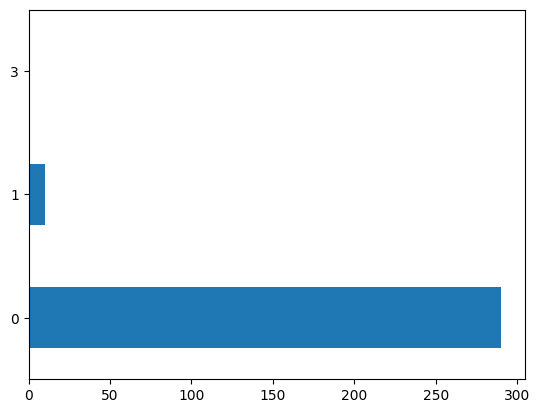

In [17]:
df["Owner"].value_counts().plot.barh();

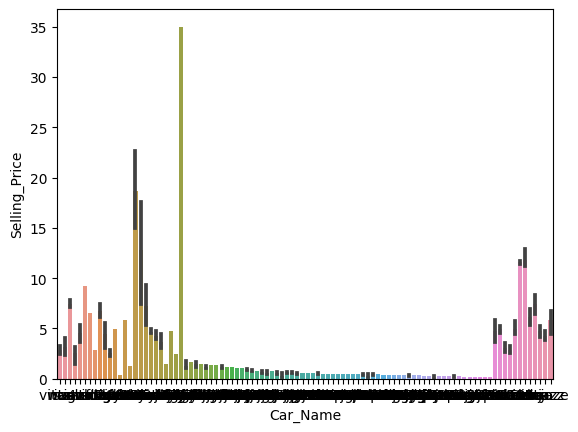

In [19]:
# seaborn kütüphanesini kullanarak barplot çizimi;

import seaborn as sns
sns.barplot(x = "Car_Name", y ="Selling_Price", data = df); 

#Dikkat ederseniz veri setinde karışıklık vardır.

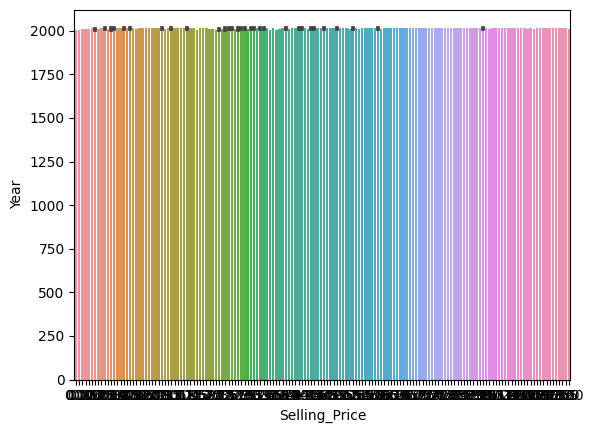

In [22]:
import seaborn as sns
sns.barplot(x = "Selling_Price", y ="Year", data = df); 

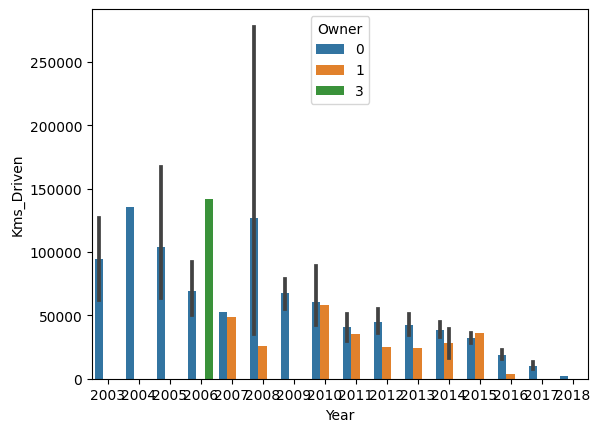

In [23]:
sns.barplot(x = "Year", y = "Kms_Driven", hue = "Owner", data = df);

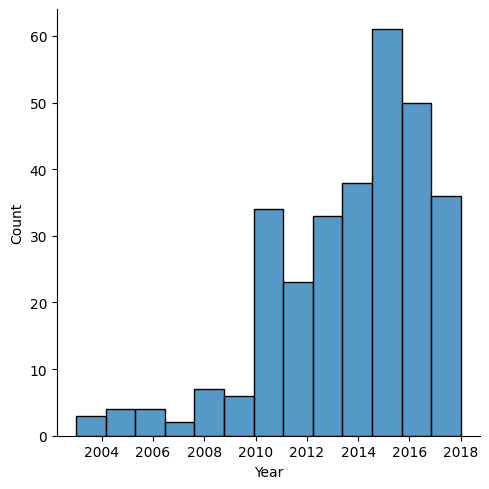

In [26]:
sns.displot(df.Year, kde = False);
#Yoğunlun yıllara göre arttığını gözlemleyebiliriz. Histogram grafiği

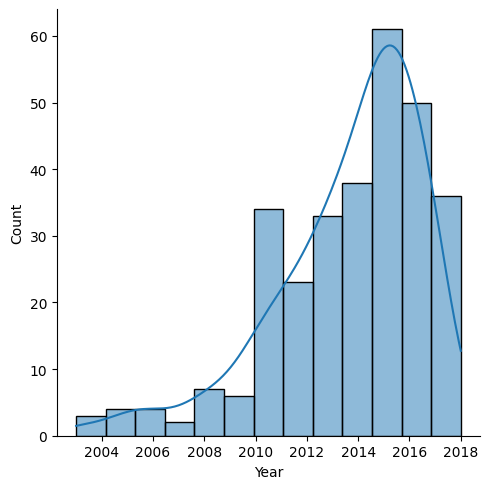

In [27]:
sns.displot(df.Year, kde = True);

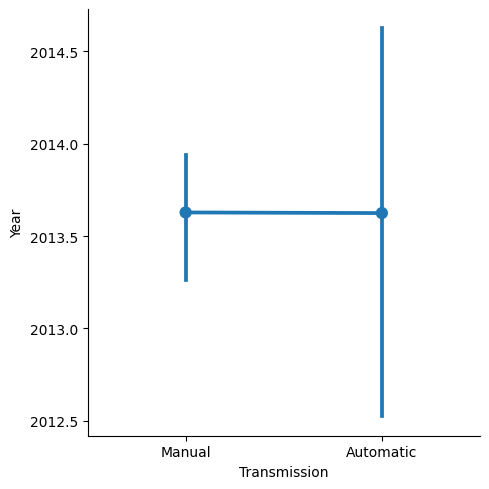

In [45]:
# Violin grafiği ile gözlem
import seaborn as sns
sns.catplot(x = "Transmission", y =  "Year", kind = "point", data = df);

In [46]:
import seaborn as sns

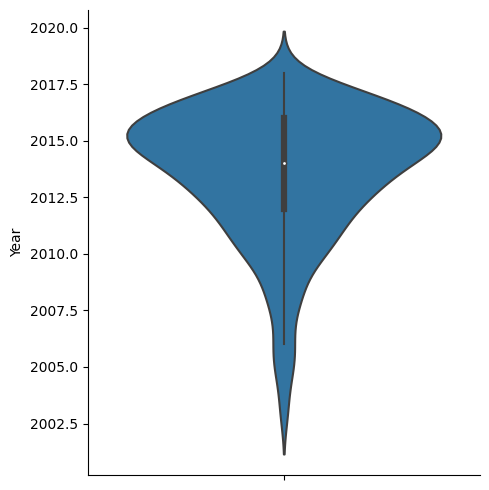

In [47]:
sns.catplot(y="Year", kind ="violin", data = df);

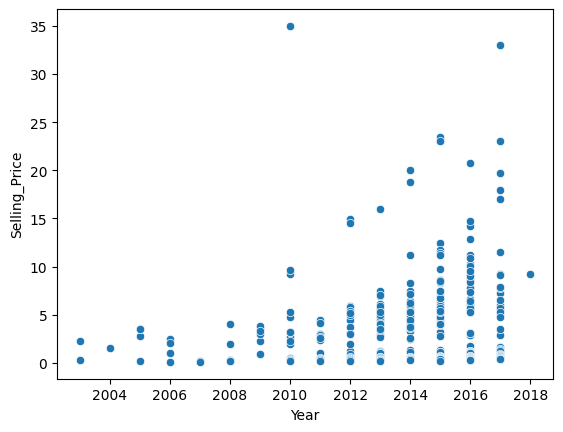

In [48]:
#korelasyon grafiği
sns.scatterplot(x = "Year", y = "Selling_Price", data = df);

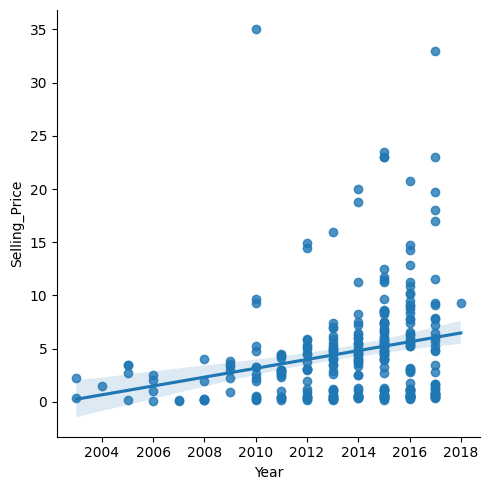

In [49]:
#Doğrusal ilişki;
sns.lmplot(x = "Year", y = "Selling_Price", data = df);

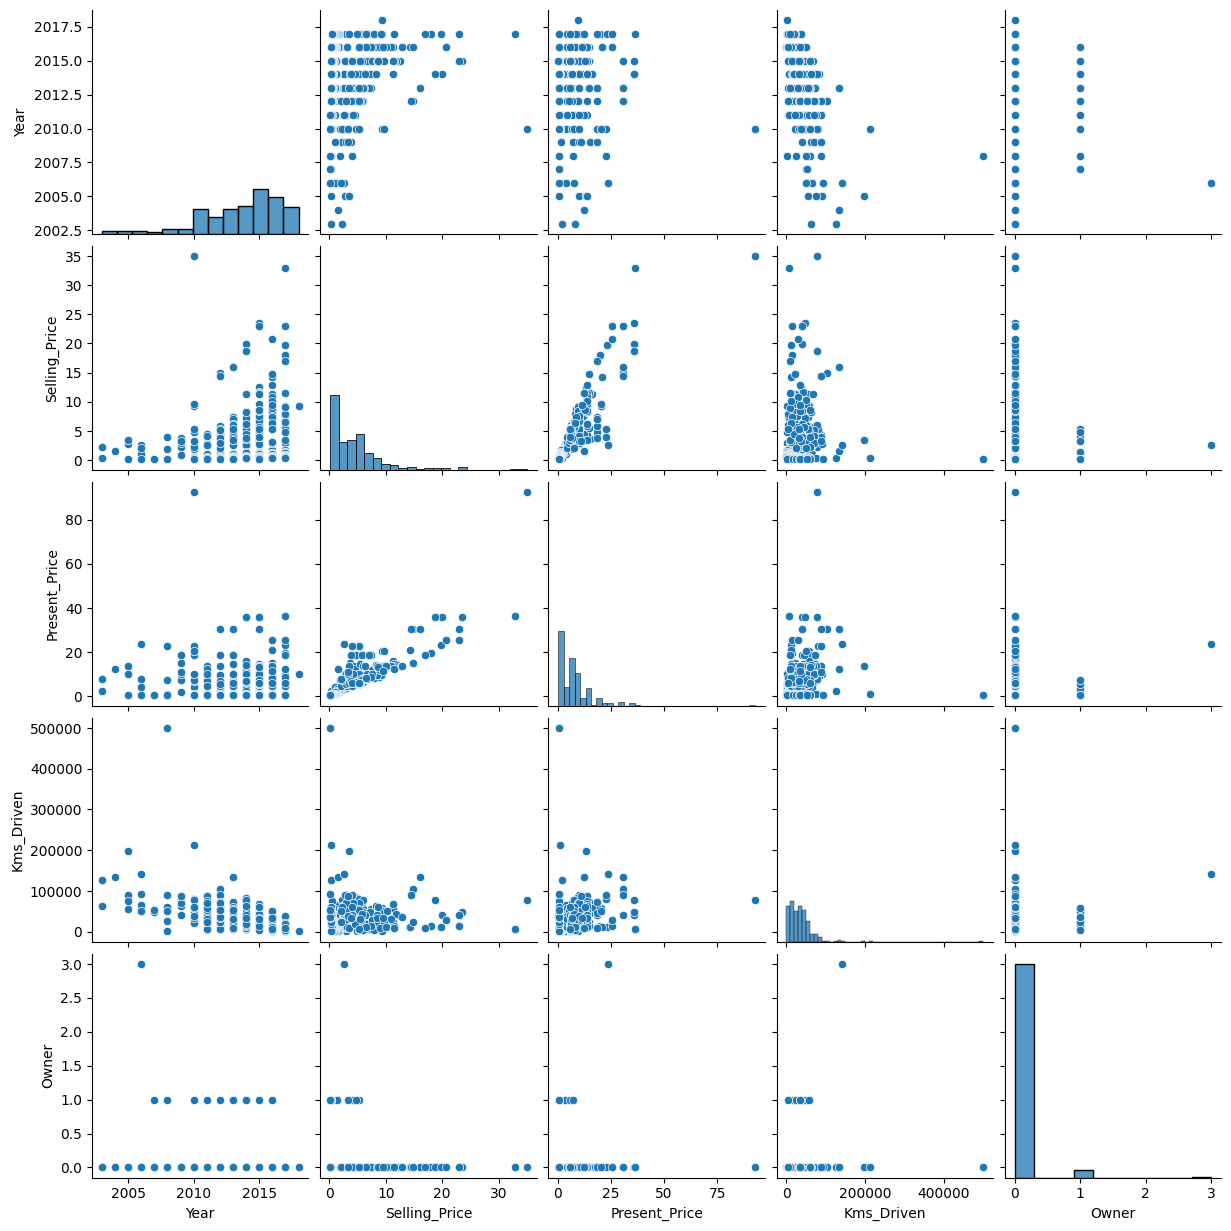

In [50]:
sns.pairplot(df);

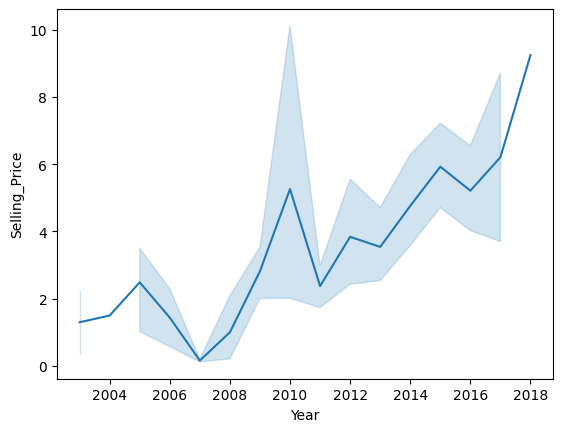

In [52]:
sns.lineplot(x ="Year", y ="Selling_Price", data =df);

In [54]:
df[0:10]
#0 dahil 10 a kadar olan gözlemleri gösterir.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [55]:
#kovarsyon
df[["Year","Selling_Price","Present_Price"]].cov()

,Year,Selling_Price,Present_Price
Year,8.361085,3.470617,-1.189364
Selling_Price,3.470617,25.834973,38.619337
Present_Price,-1.189364,38.619337,74.720731


In [56]:
#Korelasyon
df[["Year","Selling_Price","Present_Price"]].corr()

,Year,Selling_Price,Present_Price
Year,1.000000,0.236141,-0.047584
Selling_Price,0.236141,1.000000,0.878983
Present_Price,-0.047584,0.878983,1.000000


In [58]:
#sayma fonksiyonu
df.count()
#301 tane gözlem vardır.

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [63]:
#Gözlemlerin ortalaması
df.mean()

C:\Users\nurcu\AppData\Local\Temp\ipykernel_11788\1183945051.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Year              2013.627907
Selling_Price        4.661296
Present_Price        7.628472
Kms_Driven       36947.205980
Owner                0.043189
dtype: float64

In [64]:
df.median()

C:\Users\nurcu\AppData\Local\Temp\ipykernel_11788\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Year              2014.0
Selling_Price        3.6
Present_Price        6.4
Kms_Driven       32000.0
Owner                0.0
dtype: float64

In [65]:
df.min()

Car_Name               800
Year                  2003
Selling_Price          0.1
Present_Price         0.32
Kms_Driven             500
Fuel_Type              CNG
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
dtype: object

In [66]:
df.max()

Car_Name              xcent
Year                   2018
Selling_Price          35.0
Present_Price          92.6
Kms_Driven           500000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     3
dtype: object

In [67]:
#standart sapma
df.std()

C:\Users\nurcu\AppData\Local\Temp\ipykernel_11788\1940472707.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Year                 2.891554
Selling_Price        5.082812
Present_Price        8.644115
Kms_Driven       38886.883882
Owner                0.247915
dtype: float64

In [68]:
#varyans
df.var()

C:\Users\nurcu\AppData\Local\Temp\ipykernel_11788\1866002976.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Year             8.361085e+00
Selling_Price    2.583497e+01
Present_Price    7.472073e+01
Kms_Driven       1.512190e+09
Owner            6.146179e-02
dtype: float64

In [69]:
df.sum()

Car_Name         ritzsx4ciazwagon rswiftvitara brezzaciazs cros...
Year                                                        606102
Selling_Price                                              1403.05
Present_Price                                              2296.17
Kms_Driven                                                11121109
Fuel_Type        PetrolDieselPetrolPetrolDieselDieselPetrolDies...
Seller_Type      DealerDealerDealerDealerDealerDealerDealerDeal...
Transmission     ManualManualManualManualManualManualManualManu...
Owner                                                           13
dtype: object

In [6]:
#en son olarak veri setimizi pivot tablo şeklinde görmek istersek;
df.groupby("Car_Name")["Year"].mean()

Car_Name
800                  2003.000000
Activa 3g            2012.000000
Activa 4g            2017.000000
Bajaj  ct 100        2015.000000
Bajaj Avenger 150    2016.000000
                        ...     
sx4                  2009.333333
verna                2013.571429
vitara brezza        2018.000000
wagon r              2011.250000
xcent                2015.333333
Name: Year, Length: 98, dtype: float64

In [7]:
#başka bir gösterim;
df.groupby(["Car_Name"])[["Year"]].aggregate("mean").unstack()

      Car_Name         
Year  800                  2003.000000
      Activa 3g            2012.000000
      Activa 4g            2017.000000
      Bajaj  ct 100        2015.000000
      Bajaj Avenger 150    2016.000000
                              ...     
      sx4                  2009.333333
      verna                2013.571429
      vitara brezza        2018.000000
      wagon r              2011.250000
      xcent                2015.333333
Length: 98, dtype: float64

Buraya kadar incelediğiniz için teşekkür ederim.

@nursenabozdag